In [4]:
# import stuff
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
import matplotlib.gridspec as gridspec
import sklearn as sk



%load_ext autoreload
%autoreload 2

%matplotlib inline

In [5]:
# pick session
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging|FreqMorph_Decision|FreqMorph_Timeout'
tracks = 'TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]
df = df[(df['ImagingRegion']=="") | (df['ImagingRegion']=="CA1")]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [6]:
# load session
mouse = '4139265.5'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
1410,4139265.5,10_02_2019,1,TwoTower_foraging,60,1,CA1,2019-02-10,G:\My Drive\VR_Data\TwoTower\4139265.5\10_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\10_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\10_02_2...
1412,4139265.5,10_02_2019,3,TwoTower_foraging,60,1,CA1,2019-02-10,G:\My Drive\VR_Data\TwoTower\4139265.5\10_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\10_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\10_02_2...
1439,4139265.5,12_02_2019,2,TwoTower_foraging,90,1,CA1,2019-02-12,G:\My Drive\VR_Data\TwoTower\4139265.5\12_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\12_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\12_02_2...
1462,4139265.5,15_02_2019,2,TwoTower_foraging,86,1,CA1,2019-02-15,G:\My Drive\VR_Data\TwoTower\4139265.5\15_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\15_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\15_02_2...
1481,4139265.5,17_02_2019,2,TwoTower_foraging,80,1,CA1,2019-02-17,G:\My Drive\VR_Data\TwoTower\4139265.5\17_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\17_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\17_02_2...
1501,4139265.5,19_02_2019,2,TwoTower_foraging,97,1,CA1,2019-02-19,G:\My Drive\VR_Data\TwoTower\4139265.5\19_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\19_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\19_02_2...
1519,4139265.5,21_02_2019,2,TwoTower_foraging,105,1,CA1,2019-02-21,G:\My Drive\VR_Data\TwoTower\4139265.5\21_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\21_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\21_02_2...
1528,4139265.5,22_02_2019,2,TwoTower_foraging,98,1,CA1,2019-02-22,G:\My Drive\VR_Data\TwoTower\4139265.5\22_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\22_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\22_02_2...
1534,4139265.5,23_02_2019,2,TwoTower_foraging,96,1,CA1,2019-02-23,G:\My Drive\VR_Data\TwoTower\4139265.5\23_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\23_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\23_02_2...
1539,4139265.5,24_02_2019,2,TwoTower_foraging,90,1,CA1,2019-02-24,G:\My Drive\VR_Data\TwoTower\4139265.5\24_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\24_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\24_02_2...


In [7]:
sess = df_mouse.iloc[-1]

In [8]:
VRDat, C, S, A = pp.load_scan_sess(sess,fneu_coeff=0.7)
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
effMorph = (trial_info['morphs'] +  trial_info['wallJitter'] + trial_info['bckgndJitter'] + .3)/1.6
msort = np.argsort(effMorph)

num aberrant ttls 0.0
36583 (36583,) (36583, 21) 124384


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


In [9]:
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,bin_size=10,speed=VRDat['speed']._values)
print(S_trial_mat.shape)
S_trial_mat[np.isnan(S_trial_mat)]=0.
S_tm_norm = S_trial_mat/np.linalg.norm(S_trial_mat,ord=2,axis=1)[:,np.newaxis,:]
S_tm_norm = S_tm_norm[msort,:,:]
#S_tm_norm = sp.stats.zscore(S_trial_mat,axis=1)

# S_mean_mat = np.zeros([5,S_trial_mat.shape[1],S_trial_mat.shape[2]])
# for i,m in enumerate([0,.25,.5,.75,1]):
#     S_mean_mat[i,:,:]=np.nanmean(S_trial_mat[trial_info['morphs']==m,:,:],axis=0)
S_mean_mat = u.morph_pos_rate_map(S_trial_mat,effMorph)
# S_mean_mat,l = u.across_trial_avg(S_trial_mat,trial_info['morphs'])

S_mean_mat[np.isnan(S_mean_mat)]=0.
S_mean_mat_norm = S_mean_mat/np.linalg.norm(S_mean_mat,ord=2,axis=1)[:,np.newaxis,:]

print(S_mean_mat.shape)


(120, 45, 1047)
(10, 45, 1047)


In [10]:
# calculate single cell trial by trial similarity
ss_sim = np.matmul(np.transpose(S_tm_norm,axes=(2,0,1)),np.transpose(S_tm_norm,axes=(2,1,0)))
# ss_sim=ss_sim[:,msort,:]
# ss_sim=ss_sim[:,:,msort]


mu_sim = np.matmul(np.transpose(S_mean_mat_norm,axes=(2,0,1)),np.transpose(S_mean_mat_norm,axes=(2,1,0)))
print(ss_sim.shape)

(1047, 120, 120)


In [11]:
nc = 3
pca = sk.decomposition.NMF(n_components=nc)
ui = np.triu_indices(ss_sim.shape[1],k=1)
print(ui)
ss_flat = ss_sim[:,ui[0],ui[1]]
print(ss_flat.shape)
ss_ = pca.fit_transform(ss_flat)

# f,ax = plt.subplots()
# ax.plot(pca.explained_variance_[:10])

(array([  0,   0,   0, ..., 117, 117, 118], dtype=int64), array([  1,   2,   3, ..., 118, 119, 119], dtype=int64))
(1047, 7140)


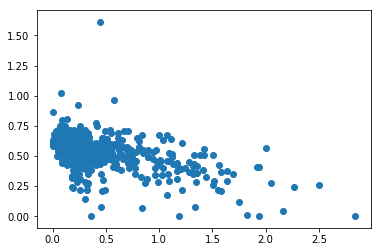

In [12]:
f,ax = plt.subplots()
ax.scatter(ss_[:,1],ss_[:,0])

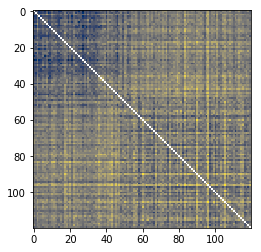

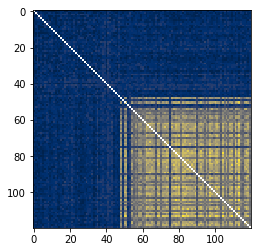

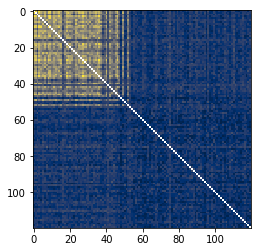

In [13]:
# cluster
H = np.zeros([nc,ss_sim.shape[1],ss_sim.shape[2]])

H[:,ui[0],ui[1]] = pca.components_#.reshape([nc,ss_sim.shape[-1],ss_sim.shape[-1]])
H += np.transpose(H,axes=(0,2,1))
for j in range(ss_.shape[1]):
    f,ax = plt.subplots()
    _H = H[j,:,:]
    
    _H[np.diag_indices_from(_H)]=np.nan
    ax.imshow(_H,cmap='cividis')


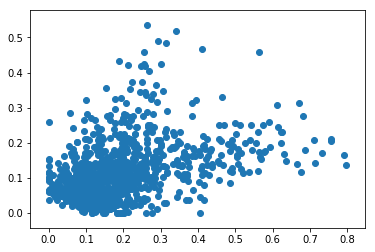

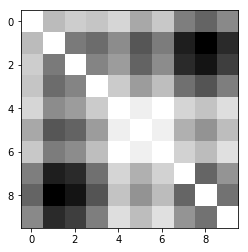

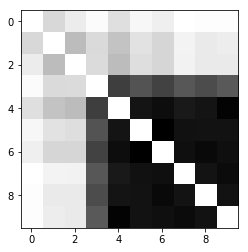

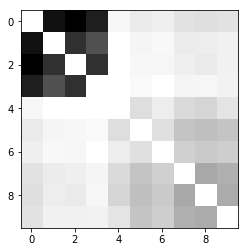

In [14]:
nc = 3
pca = sk.decomposition.NMF(n_components=nc)

ui = np.triu_indices(mu_sim.shape[1],k=1)
mu_flat = mu_sim[:,ui[0],ui[1]]
ss_ = pca.fit_transform(mu_flat)


# ss_ = pca.fit_transform(mu_sim.reshape([mu_sim.shape[0],-1]))


f,ax = plt.subplots()
ax.scatter(ss_[:,1],ss_[:,2])


H = np.zeros([nc,mu_sim.shape[1],mu_sim.shape[2]])

H[:,ui[0],ui[1]] = pca.components_#.reshape([nc,ss_sim.shape[-1],ss_sim.shape[-1]])
H += np.transpose(H,axes=(0,2,1))
for j in range(ss_.shape[1]):
    f,ax = plt.subplots()
    _H = H[j,:,:]
    
    _H[np.diag_indices_from(_H)]=np.nan
    ax.imshow(_H,cmap='Greys')


In [15]:
S_tm_norm = S_trial_mat/np.linalg.norm(S_trial_mat,ord=2,axis=1)[:,np.newaxis,:]
S_mat =  np.transpose(np.matmul(np.transpose(S_tm_norm,axes=(2,0,1)),np.transpose(S_tm_norm,axes=(2,1,0))),axes=(1,2,0))
S_mat_mu,l = u.across_trial_avg(S_mat,trial_info['morphs'])
S_mat_mu,l = u.across_trial_avg(np.transpose(S_mat_mu,axes=(1,0,2)),trial_info['morphs'])
print(S_mat.shape,S_mat_mu.shape)

(120, 120, 1047) (5, 5, 1047)


In [16]:
# function to return upper triangle of binned single cell similarity matrices
def binned_sim_triu(sess):
    VRDat, C, S, A = pp.load_scan_sess(sess,fneu_coeff=0.7)
    trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
    effMorph = (trial_info['morphs'] +  trial_info['wallJitter'] + trial_info['bckgndJitter'] + .3)/1.6
    msort = np.argsort(effMorph)
    
    
    S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,bin_size=10,speed=VRDat['speed']._values)
    S_tm_norm = S_trial_mat/np.linalg.norm(S_trial_mat,ord=2,axis=1)[:,np.newaxis,:]
    S_mat =  np.transpose(np.matmul(np.transpose(S_tm_norm,axes=(2,0,1)),np.transpose(S_tm_norm,axes=(2,1,0))),axes=(1,2,0))
    S_mat[np.isnan(S_mat)]=0
    S_mat/=S_mat.ravel().mean()
    print(S_mat.shape)
    
#     mu_sim,l = u.across_trial_avg(S_mat,trial_info['morphs'])
    mu_sim = u.morph_pos_rate_map(S_mat,effMorph)
#     mu_sim,l = u.across_trial_avg(np.transpose(mu_sim,axes=(1,0,2)),trial_info['morphs'])
    mu_sim = u.morph_pos_rate_map(np.transpose(mu_sim,axes=(1,0,2)),effMorph)
    mu_sim = np.transpose(mu_sim,axes=(2,0,1))
    
    
    
#     S_mean_mat,l = u.across_trial_avg(S_trial_mat,trial_info['morphs'])

#     S_mean_mat[np.isnan(S_mean_mat)]=0.
#     S_mean_mat_norm = S_mean_mat/np.linalg.norm(S_mean_mat,ord=2,axis=1)[:,np.newaxis,:]
    
#     mu_sim = np.matmul(np.transpose(S_mean_mat_norm,axes=(2,0,1)),np.transpose(S_mean_mat_norm,axes=(2,1,0)))
    
    ui = np.triu_indices(mu_sim.shape[1],k=1)
    return mu_sim[:,ui[0],ui[1]]



# function to stack all single cell vectors
def build_matrix(mouse_list,first_sess=5):
    
    
    for m, mouse in enumerate(mouse_list):    
        print(mouse)
        df_mouse = df[df['MouseName'].str.match(mouse)]
        for i, sess_ind in enumerate(range(first_sess,df_mouse.shape[0])):
            vec = binned_sim_triu(df_mouse.iloc[sess_ind])
            if (m==0) and (i==0):
                cellmat = vec
            else:
                cellmat = np.concatenate((cellmat,vec),axis=0)
        
    return cellmat

V_rare = build_matrix(['4139265.5','4139265.4','4139265.3'])
V_fam = build_matrix(['4222153.2','4222153.1','4222153.3','4222174.1'],first_sess=4)
    
    



4139265.5
num aberrant ttls 0.0
34737 (34737,) (34737, 21) 113863


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
(120, 120, 915)
num aberrant ttls 0.0
36018 (36018,) (36018, 21) 118606
frame diff 0
(120, 120, 976)
num aberrant ttls 0.0
40272 (40272,) (40272, 21) 133982
frame diff 0
(120, 120, 984)
num aberrant ttls 0.0
36659 (36659,) (36659, 21) 120387
frame diff 0
(120, 120, 932)
num aberrant ttls 0.0
36583 (36583,) (36583, 21) 124384
frame diff 0
(120, 120, 1047)
4139265.4
num aberrant ttls 0.0
30897 (30897,) (30897, 21) 102093
frame diff 0
(120, 120, 1632)
num aberrant ttls 0.0
29023 (29023,) (29023, 21) 95160
frame diff 0
(120, 120, 1656)
num aberrant ttls 0.0
31116 (31116,) (31116, 21) 102131
frame diff 0


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(120, 120, 1515)
num aberrant ttls 0.0
31932 (31932,) (31932, 21) 105228
frame diff 0
(120, 120, 1650)
num aberrant ttls 0.0
30493 (30493,) (30493, 21) 100982
frame diff 0
(120, 120, 1498)
num aberrant ttls 0.0
32084 (32084,) (32084, 21) 105601
frame diff 0
(120, 120, 1631)
4139265.3
num aberrant ttls 0.0
35085 (35085,) (35085, 21) 115307
frame diff 0
(120, 120, 1828)
num aberrant ttls 0.0
33140 (33140,) (33140, 21) 109003
frame diff 0
(120, 120, 1904)
num aberrant ttls 0.0
38209 (38209,) (38209, 21) 126969
frame diff 0
(120, 120, 1817)
num aberrant ttls 0.0
33547 (33547,) (33547, 21) 110218
frame diff 0
(120, 120, 1708)
num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
frame diff 0
(120, 120, 1715)
4222153.2
num aberrant ttls 0.0
35248 (35248,) (35248, 21) 116195
frame diff 0
(120, 120, 2127)
num aberrant ttls 0.0
33545 (33545,) (33545, 21) 121243
frame diff 0
(120, 120, 2149)
num aberrant ttls 0.0
38697 (38697,) (38697, 21) 129389
frame diff 0
(100, 100, 2046)
num aberrant ttls

In [667]:
print(V_rare.shape,V_fam.shape)

(23408, 45) (19271, 45)


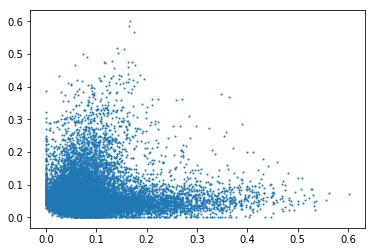

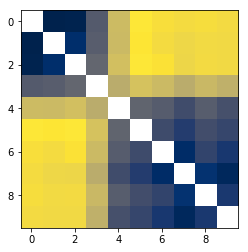

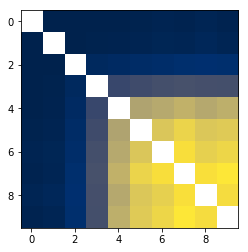

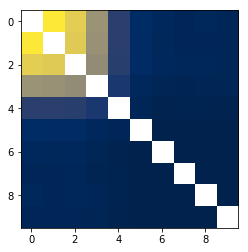

In [17]:
nc = 3
nf = 10
pca = sk.decomposition.NMF(n_components=nc)
V_ = V_rare
V_/=V_.mean(axis=1)[:,np.newaxis]
ui = np.triu_indices(nf,k=1)
half = np.zeros([V_.shape[0],])
half[np.random.permutation(V_.shape[0])[:int(V_.shape[0]/2)]]=1
V_tr = V_[:,:]
ss_ = pca.fit_transform(V_tr)

ss__ = np.matmul(V_[:,:],pca.components_.T)

f,ax = plt.subplots()
ax.scatter(ss_[:,1],ss_[:,2],s=1)


H = np.zeros([nc,nf,nf])

H[:,ui[0],ui[1]] = pca.components_#.reshape([nc,ss_sim.shape[-1],ss_sim.shape[-1]])
H += np.transpose(H,axes=(0,2,1))
for j in range(ss_.shape[1]):
    f,ax = plt.subplots()
    _H = H[j,:,:]
    
    _H[np.diag_indices_from(_H)]=np.nan
    ax.imshow(_H,cmap='cividis')

    
    


In [670]:
# inspect by hand to ensure normalization isn't necessary

In [2]:
# run NMF on whole matrix
import ensemble as nmf

In [18]:
print(nmf.__file__)

C:\Users\mplitt\nmftools-master\nmftools\ensemble.py


In [ ]:
results = nmf.fit_ensemble_cv(V_,np.arange(1,10),n_replicates=3)


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

replicate 0
replicate 1
replicate 2



 11%|█████████▎                                                                          | 1/9 [00:31<04:12, 31.62s/it]

replicate 0
replicate 1
replicate 2



 22%|██████████████████▋                                                                 | 2/9 [03:53<09:39, 82.85s/it]

replicate 0
replicate 1
replicate 2



 33%|███████████████████████████▋                                                       | 3/9 [07:47<12:47, 127.97s/it]

replicate 0
replicate 1
replicate 2



 44%|████████████████████████████████████▉                                              | 4/9 [13:09<15:30, 186.16s/it]

replicate 0
replicate 1
replicate 2



 56%|██████████████████████████████████████████████                                     | 5/9 [19:15<16:00, 240.15s/it]

replicate 0
replicate 1
replicate 2



 67%|███████████████████████████████████████████████████████▎                           | 6/9 [25:44<14:14, 284.76s/it]

replicate 0
replicate 1
replicate 2



 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [33:00<11:00, 330.14s/it]

replicate 0
replicate 1
replicate 2



 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [40:29<06:05, 365.86s/it]

replicate 0


In [ ]:
import plots 
ax = plots.plot_rmse(results,plot_svd=False)
# ax.set_ylim([.148,.153])

In [25]:
print(results[2])

{'factors': [[array([[1.06617592, 0.11787898],
       [0.        , 1.35119547],
       [0.69415095, 0.45043662],
       ...,
       [0.63708474, 0.53487497],
       [0.67069728, 0.51058666],
       [0.46435278, 0.73511941]]), array([[1.56139191, 1.47432468, 1.31552595, 1.07934435, 1.03388545,
        1.00361289, 1.00063375, 1.00554802, 1.00832161, 1.46241402,
        1.31180407, 1.07001114, 1.01937694, 0.9985144 , 0.99809866,
        0.9940134 , 0.98962805, 1.29406883, 1.06047357, 1.01307761,
        1.0002641 , 0.98028105, 0.97485262, 0.97337521, 0.95884709,
        0.90851879, 0.88503486, 0.86413851, 0.88064296, 0.87715295,
        0.65647194, 0.62864827, 0.5999285 , 0.62979432, 0.60153834,
        0.55563235, 0.52586975, 0.55780074, 0.53919298, 0.49025121,
        0.52739864, 0.51111288, 0.4955546 , 0.4750751 , 0.5041196 ],
       [0.14359753, 0.19207346, 0.30961172, 0.46220794, 0.50583474,
        0.52570193, 0.52009841, 0.52109755, 0.50848168, 0.21096444,
        0.3173022 , 0.476

In [39]:
testerr = []
err = []
for r in results:
    testerr.append(list(results[r]['test_err']))
    err.append(list(results[r]['train_err']))

In [40]:
print(testerr)

[[0.032416482590224144], [0.024086516892084842], [0.019733079734270447], [0.019449741210897598], [0.01932017426477223]]


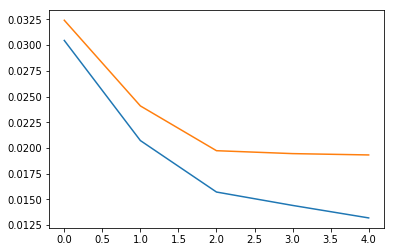

In [41]:
f,ax = plt.subplots()
ax.plot(np.array(err).ravel())
ax.plot(np.array(testerr).ravel())